# 라이브러리 및 사진 준비

In [2]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [50]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/catimage.jpg'  
img_orig = cv2.imread(img_path) 

# Segmentation 모델 

In [6]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

urllib.request.urlretrieve(model_url, model_file)

model = semantic_segmentation() 
model.load_pascalvoc_model(model_file)

In [51]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [9]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

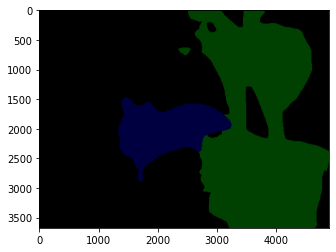

background
cat
pottedplant


In [52]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력

#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

- 컬러맵

In [53]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [50]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/catimage.jpg'  
img_orig = cv2.imread(img_path) 

## 고양이

In [54]:
colormap[8]

array([64,  0,  0])

In [55]:
cat_color=(0,0,64)

(3672, 4896)


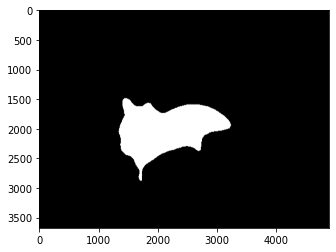

In [56]:
cat_map = np.all(output1==cat_color, axis=-1) 
print(cat_map.shape) 
plt.imshow(cat_map, cmap='gray')
plt.show()

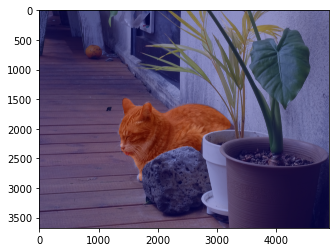

In [57]:
img_show = img_orig.copy()

img_mask = cat_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

- 블러처리하기

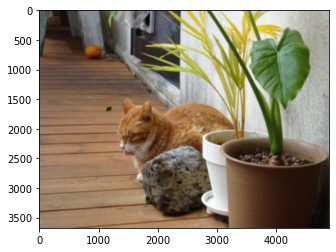

In [59]:
img_orig_blur = cv2.blur(img_orig, (25,25))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

블러가 약함 -> 커널크기 크게 설정/ GaussianBlur() 사용

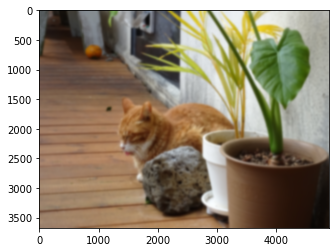

In [61]:
img_orig_blur = cv2.GaussianBlur(img_orig, (101, 101), 0)  # 커널 크기와 표준 편차를 크게 설정
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

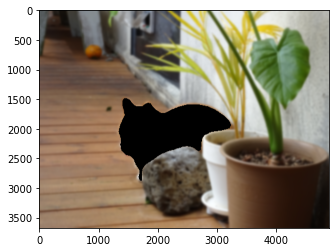

In [62]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

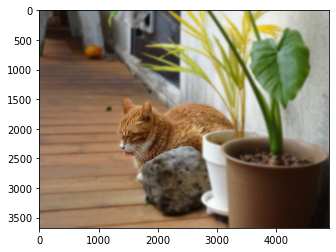

In [63]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 사람

In [46]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/person.jpg'  
img_orig = cv2.imread(img_path) 

# Segmentation 모델 

In [47]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

urllib.request.urlretrieve(model_url, model_file)

model = semantic_segmentation() 
model.load_pascalvoc_model(model_file)

In [48]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [49]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

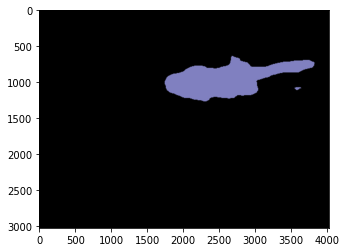

background
person


In [50]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력

#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

- 컬러맵

In [51]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [52]:
seg_color = (128,128,192)

(3024, 4032)


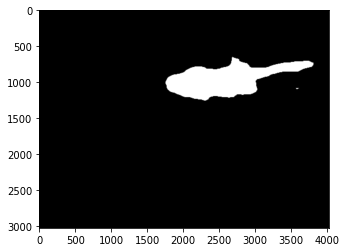

In [54]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

In [55]:
print("img_show shape:", img_show.shape)
print("color_mask shape:", color_mask.shape)

img_show shape: (4032, 3024, 3)
color_mask shape: (3024, 4032, 3)


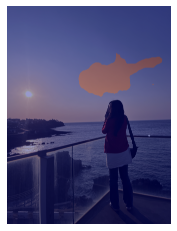

In [56]:
# color_mask를 img_show의 크기에 맞게 리사이즈
color_mask_resized = cv2.resize(color_mask, (img_show.shape[1], img_show.shape[0]))

# 이미지 혼합
img_show = cv2.addWeighted(img_show, 0.6, color_mask_resized, 0.4, 0.0)

# 시각화
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

사람이 아닌데.... 

In [57]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

error: OpenCV(4.5.3) /tmp/pip-req-build-agffqapq/opencv/modules/core/src/arithm.cpp:647: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


## 인식 못함 문제 발생!!

-> 다른 모델 사용
-> 사진 화질 좋게 수정한 다음에 입력하기

# MediaPipe-Selfie Segmentation 사용

In [60]:
import cv2
import mediapipe as mp
import numpy as np
import os
import matplotlib.pyplot as plt

W0000 00:00:1744700646.548264     125 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


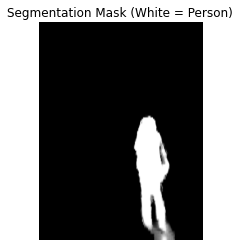

In [62]:


# MediaPipe 모델 로드
mp_selfie_segmentation = mp.solutions.selfie_segmentation
with mp_selfie_segmentation.SelfieSegmentation(model_selection=1) as selfie_segmentation:
    
    # 세그멘테이션 수행
    result = selfie_segmentation.process(img_rgb)
    mask = result.segmentation_mask  # 0~1 float mask

# 인물 마스크 시각화
plt.imshow(mask, cmap='gray')  # 회색조로 시각화
plt.axis('off')
plt.title("Segmentation Mask (White = Person)")
plt.show()


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1744700587.232351     122 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


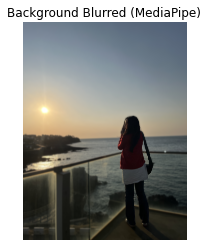

In [61]:
# 이미지 경로 및 로드
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/person.jpg'
img_orig = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)

# MediaPipe Selfie Segmentation 모델 로드
mp_selfie_segmentation = mp.solutions.selfie_segmentation
with mp_selfie_segmentation.SelfieSegmentation(model_selection=1) as selfie_segmentation:
    
    # 세그멘테이션 수행
    result = selfie_segmentation.process(img_rgb)
    mask = result.segmentation_mask  # 0~1 값의 마스크

    # 인물 영역만 True, 배경은 False (threshold 조절 가능)
    condition = mask > 0.5

    # 배경 블러 처리
    blurred_bg = cv2.GaussianBlur(img_orig, (55, 55), 0)

    # 인물은 원본, 배경은 블러 이미지
    output_image = np.where(condition[..., None], img_orig, blurred_bg)

# 결과 시각화
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Background Blurred (MediaPipe)")
plt.show()

### 왜지?

- MediaPipe는 딱 사람만 뽑아내도록 훈련됨. 
- 화상회의, AR 같은 실시간 환경에서도 동작할 수 있게 경량화 + 정제된 셀피 데이터셋 사용
-주변 환경(노을, 어두운 방, 셀카 필터 등) 고려된 훈련이 잘 되어 있음
<br>따라서 다양한 객체 구분하고 싶을 때 - DeepLabV3+
사람 인물만 뽑고 싶을 땐 - MediaPipe Selfie Segmentation

## 회고
### 고은
처음에는 DeepLabV3+ 모델을 사용했지만, 어두운 조명이나 노을빛 사진에서는 인물을 제대로 분리하지 못하는 경우가 많았다.
이후 MediaPipe의 Selfie Segmentation 모델을 사용해보니, 사람 인식 정확도가 훨씬 높았고, 노이즈 있는 사진에서도 인물을 잘 분리해냈다.
특히 실시간을 위한 모델이라 그런지 빠르고 가볍게 작동했다.
또한 이미지 크기 불일치로 인한 오류(OpenCV addWeighted 에러)나 세그멘테이션 마스크 시각화 과정에서 마스크가 어떻게 표현되는지도 배울 수 있었다.
<br><br>
평소에 아무 생각 없이 사용하던 기술들이 예상보다 훨씬 발전된 기술이었다는 걸 체감할 수 있었다. 